# **ML-AI4Econ Course**

We first download the different packages needed for this part of the course:

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances
from scipy.spatial.distance import cdist

We also set a random seed for reproducible results:

In [151]:
np.random.seed(42)

### Multivariate Statistics

As a first practice, we will generate a synthetic dataset. This dataset is being created by drawing observations from three independent standard normal distributions. 

In [152]:
num_samples = 200
dimensions = 3

data = np.random.randn(num_samples, dimensions)  # Normal distribution
columns = ['Feature 1', 'Feature 2', 'Feature 3']
df = pd.DataFrame(data, columns=columns)
print("Example of Multivariate Data:")
print(df.head())

Example of Multivariate Data:
   Feature 1  Feature 2  Feature 3
0   0.496714  -0.138264   0.647689
1   1.523030  -0.234153  -0.234137
2   1.579213   0.767435  -0.469474
3   0.542560  -0.463418  -0.465730
4   0.241962  -1.913280  -1.724918


Because each column has been generated by a standard normal distribution, it is like if we had a small set of random variables which for which we have been drawing as many times as the defined number of samples. Now, we can take a look at the mean vector, the covariance and the correlation matrix for this dataset.

In [153]:
mean_vector = df.mean()
cov_matrix = df.cov()
corr_matrix = df.corr()
print("\nMean Vector:")
print(mean_vector)
print("\nCovariance Matrix:")
print(cov_matrix)
print("\nCorrelation Matrix:")
print(corr_matrix)


Mean Vector:
Feature 1    0.062469
Feature 2   -0.146899
Feature 3    0.043873
dtype: float64

Covariance Matrix:
           Feature 1  Feature 2  Feature 3
Feature 1   0.798089   0.031538  -0.051737
Feature 2   0.031538   1.007424  -0.069389
Feature 3  -0.051737  -0.069389   1.012461

Correlation Matrix:
           Feature 1  Feature 2  Feature 3
Feature 1   1.000000   0.035173  -0.057555
Feature 2   0.035173   1.000000  -0.068706
Feature 3  -0.057555  -0.068706   1.000000


As you can see, when we deal with a multivariate setting (when we have a dataset with multiple variables), we can treat this dataset as draws from a random vector, and hence we can compute the different statistics that have been shown in the slides. We do not obtain a single measure, but a vector or matrix version of each statistic. We can now better visualize the relationships between each pair of variables and the distribution of each one of them separately:

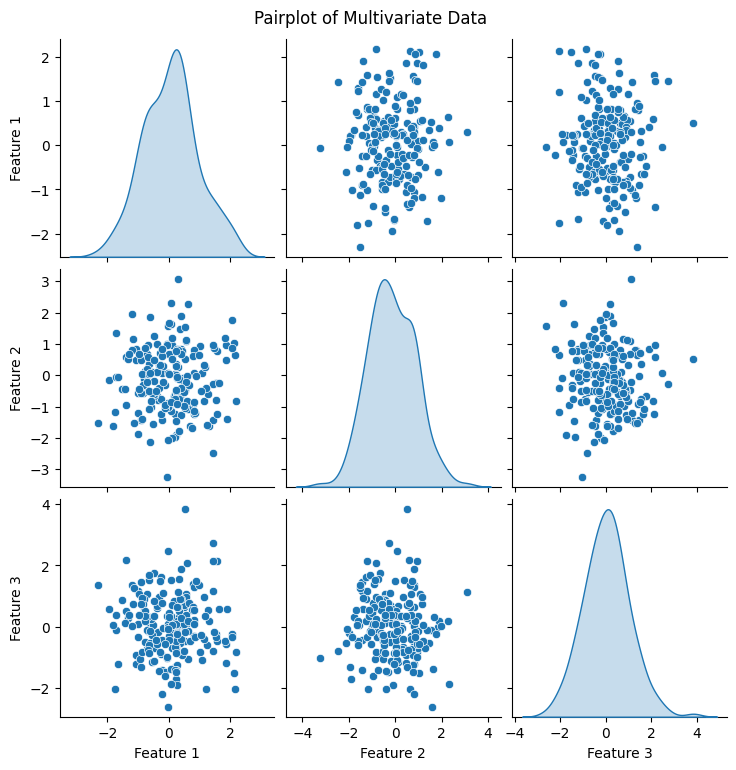

In [154]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairplot of Multivariate Data", y=1.02)
plt.show()

Indeed, because we can consider a dataset as a draw from a random vector, this vector has an inherent multivariate distribution, even if the marginnal distributions of each variable are different or the different variables are not related among each other. This multivariate distribution depends on more than one range of values (more than one sample space), and we can exemplify this by creating a bivariate normal distribution:

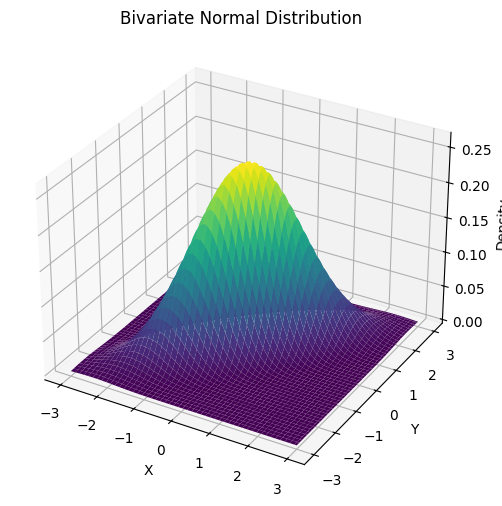

In [155]:
mu = [0, 0]  # Mean
sigma = [[1, 0.8], [0.8, 1]]  # Covariance matrix
rv = multivariate_normal(mu, sigma)

x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
pos = np.dstack((x, y))
z = rv.pdf(pos)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
plt.title("Bivariate Normal Distribution")
plt.show()

You can observe now it is a 3D shape, as we have the density in the $z$ or vertical axis, and the sample space for the random variables in the horizontal axes.

### Distances

A **distance function**, or **metric**, is a function that quantifies how far apart two points are in a given space. Formally, a function $d: X \times X \to \mathbb{R}$ is called a **metric** on a set $X$ if it satisfies the following properties for all points $( x, y, z) \in X$:

- Non-negativity: $d(x, y) \geq 0$

- Identity of Indiscernibles: $d(x, y) = 0 \quad \text{if and only if} \quad x = y$

- Symmetry: $d(x, y) = d(y, x)$

- Triangle Inequality: $d(x, z) \leq d(x, y) + d(y, z)$

These properties ensure that a distance function behaves as expected in both mathematical theory and practical applications. To get a good understanding of how we measure distance is relevant, let's check the following example: we are now sampling some random data points, and we will compute the distances through different metrics.

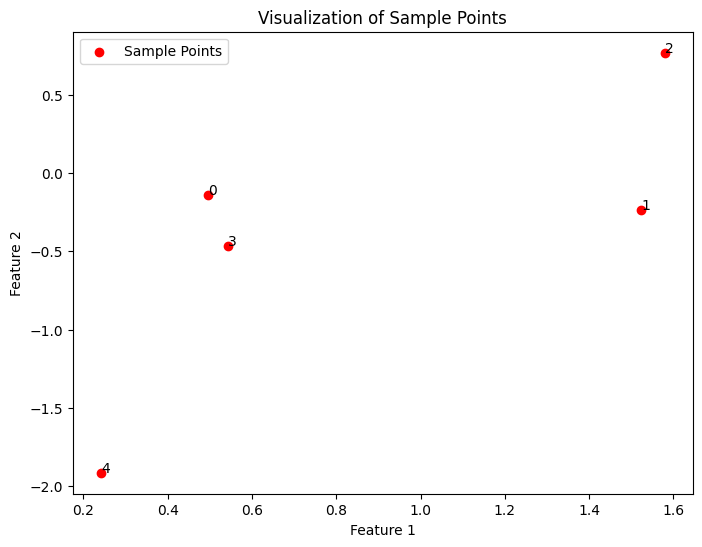

In [156]:
sample_points = df.iloc[:5]
sample_df = pd.DataFrame(sample_points, columns=['Feature 1', 'Feature 2', 'Feature 3'])

plt.figure(figsize=(8, 6))
plt.scatter(sample_points.iloc[:, 0], sample_points.iloc[:, 1], c='red', label='Sample Points')
for i, txt in enumerate(sample_points.index):
    plt.annotate(txt, (sample_points.iloc[i, 0], sample_points.iloc[i, 1]))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Visualization of Sample Points")
plt.legend()
plt.show()


One of the most common distance metrics is the **Euclidean distance**, which is defined as:

$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

where $( x, y )$ are two points in an $n$-dimensional space.

This metric satisfies all the required properties and is widely used in machine learning, clustering, and statistical analysis.

In [157]:
euclidean_matrix = euclidean_distances(sample_points, sample_points)

print("\nEuclidean Distance Matrix:")
print(pd.DataFrame(euclidean_matrix, index=sample_points.index, columns=sample_points.index))


Euclidean Distance Matrix:
              0         1         2         3             4
0  1.490116e-08  1.356516  1.800041  1.160830  2.974028e+00
1  1.356516e+00  0.000000  1.030397  1.033208  2.585155e+00
2  1.800041e+00  1.030397  0.000000  1.609242  3.248170e+00
3  1.160830e+00  1.033208  1.609242  0.000000  1.943712e+00
4  2.974028e+00  2.585155  3.248170  1.943712  4.214685e-08


The **Mahalanobis distance** is a measure of distance between a point and a distribution. Given a point $\mathbf{x}$ and a mean vector $\mu$, the Mahalanobis distance is defined as:

$$
d_M(\mathbf{x}, \mu) = \sqrt{(\mathbf{x} - \mu)^T S^{-1} (\mathbf{x} - \mu)}
$$

where:
- $\mathbf{x}$ is the data point (vector),
- $\mu$ is the mean vector of the distribution,
- $S$ is the covariance matrix of the dataset,
- $S^{-1}$ is the inverse of the covariance matrix.

In [158]:
cov_matrix = np.cov(sample_points, rowvar=False)
cov_inv = np.linalg.inv(cov_matrix)
mahalanobis_matrix = cdist(sample_points, sample_points, metric='mahalanobis', VI=cov_inv)
print("\nMahalanobis Distance Matrix:")
print(pd.DataFrame(mahalanobis_matrix, index=sample_df.index, columns=sample_df.index))


Mahalanobis Distance Matrix:
          0         1         2         3         4
0  0.000000  2.570568  2.822194  1.555604  2.823571
1  2.570568  0.000000  2.648675  2.569461  2.640326
2  2.822194  2.648675  0.000000  1.808686  2.828342
3  1.555604  2.569461  1.808686  0.000000  1.781896
4  2.823571  2.640326  2.828342  1.781896  0.000000


The **Manhattan distance**, also known as the **Taxicab distance** or **L1 norm**, measures the distance between two points by summing the absolute differences of their coordinates. For two points $\mathbf{x}$ and $\mathbf{y}$, the **Manhattan distance** is given by:

$$
d_M(x, y) = \sum_{i=1}^{n} |\mathbf{x}_i - \mathbf{y}_i|
$$

where:
- $\mathbf{x}_i$ and $\mathbf{y}_i$ are the coordinates of the points in an $n$-dimensional space.


In [159]:
manhattan_matrix = manhattan_distances(sample_points, sample_points)
print("\nManhattan Distance Matrix:")
print(pd.DataFrame(manhattan_matrix, index=sample_points.index, columns=sample_points.index))


Manhattan Distance Matrix:
          0         1         2         3         4
0  0.000000  2.004030  3.105361  1.484418  4.402374
1  2.004030  0.000000  1.293108  1.441327  4.450975
2  3.105361  1.293108  0.000000  2.271250  5.273409
3  1.484418  1.441327  2.271250  0.000000  3.009648
4  4.402374  4.450975  5.273409  3.009648  0.000000


The **Cosine distance** measures the **angular difference** between two vectors. It is widely used in **text similarity**, **recommendation systems**, and **high-dimensional spaces**. The **Cosine similarity** between two vectors $\mathbf{x}$ and $\mathbf{y}$ is given by:

$$
\cos(\theta) = \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\| \|\mathbf{y}\|}
$$

where:
- $\mathbf{x} \cdot \mathbf{y}$ is the dot product of the vectors,
- $\|\mathbf{x}\|$ and $\|\mathbf{y}\|$ are the Euclidean norms (magnitudes) of the vectors.

The **Cosine distance** is then defined as:

$$
d_C(x, y) = 1 - \cos(\theta)
$$


In [160]:
cosine_matrix = cosine_distances(sample_points, sample_points)
print("\nCosine Distance Matrix:")
print(pd.DataFrame(cosine_matrix, index=sample_points.index, columns=sample_points.index))


Cosine Distance Matrix:
          0         1         2         3         4
0  0.000000  0.506133  0.751275  0.954744  1.341968
1  0.506133  0.000000  0.175571  0.213969  0.697379
2  0.751275  0.175571  0.000000  0.535190  1.058777
3  0.954744  0.213969  0.535190  0.000000  0.173891
4  1.341968  0.697379  1.058777  0.173891  0.000000


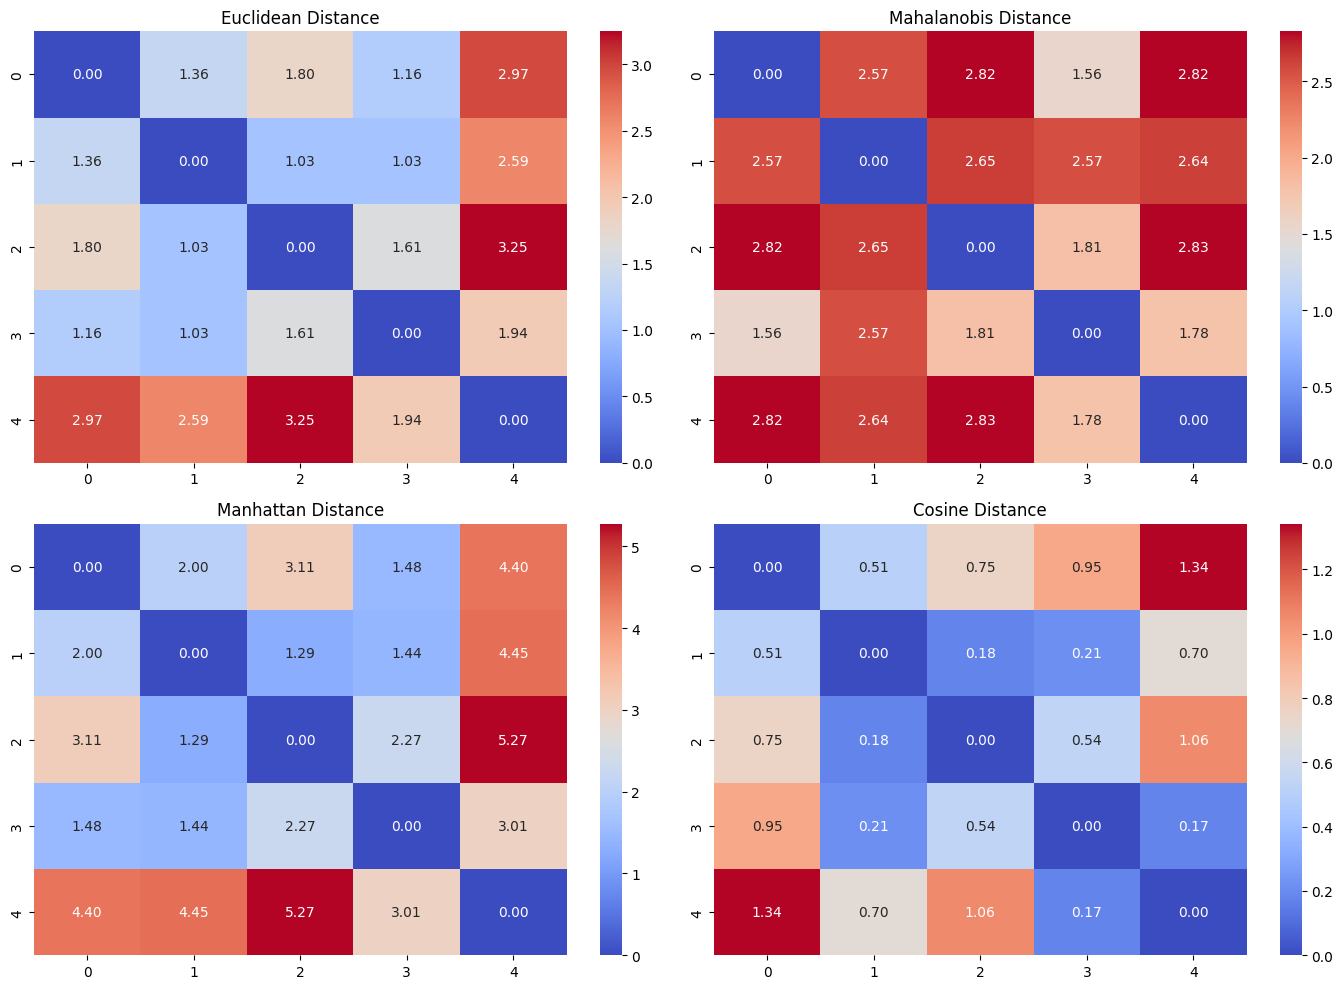

In [161]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

distance_matrices = [(euclidean_matrix, "Euclidean Distance"),
                     (mahalanobis_matrix, "Mahalanobis Distance"), 
                     (manhattan_matrix, "Manhattan Distance"), 
                     (cosine_matrix, "Cosine Distance")]

axes = axes.flatten()

for ax, (matrix, title) in zip(axes, distance_matrices):
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

### Curse of Dimensionality

The curse of dimensionality is easily one of the biggest problems in ML \& AI. To visualize the issue, we will use the notion of distances between points and dimensions (the number of variables).Let's consider different number of dimensions and the distribution of the distances for the various sampled points.

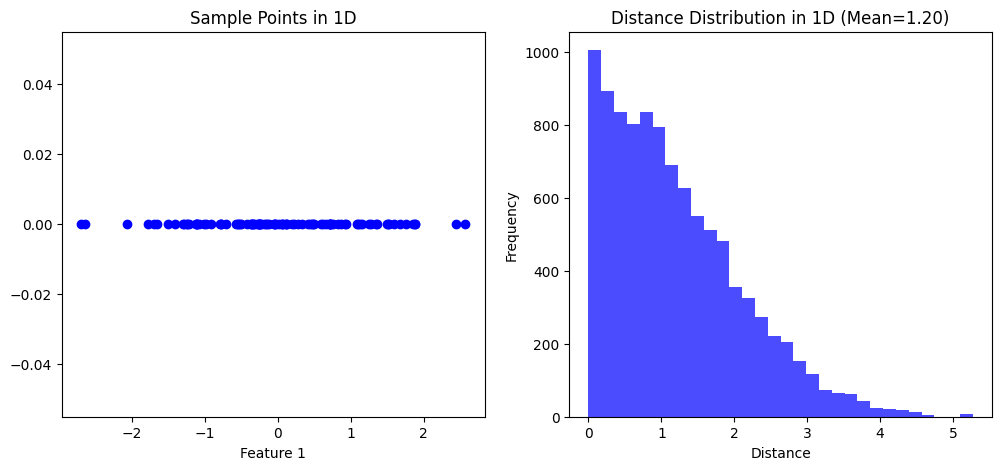

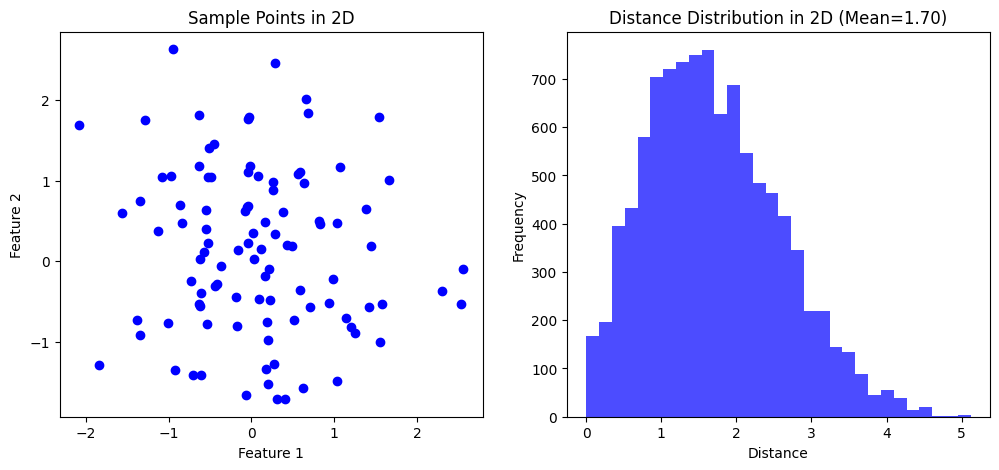

In [162]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1D Case
high_dim_data_1D = np.random.randn(100, 1)
distances_1D = euclidean_distances(high_dim_data_1D, high_dim_data_1D)
mean_distance = np.mean(distances_1D)
axes[0].scatter(high_dim_data_1D, np.zeros_like(high_dim_data_1D), c='blue')
axes[0].set_title("Sample Points in 1D")
axes[0].set_xlabel("Feature 1")

axes[1].hist(distances_1D.flatten(), bins=30, alpha=0.7, color='b')
axes[1].set_title(f"Distance Distribution in 1D (Mean={mean_distance:.2f})")
axes[1].set_xlabel("Distance")
axes[1].set_ylabel("Frequency")
plt.show()

# 2D Case
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
high_dim_data_2D = np.random.randn(100, 2)
distances_2D = euclidean_distances(high_dim_data_2D, high_dim_data_2D)
mean_distance = np.mean(distances_2D)
axes[0].scatter(high_dim_data_2D[:, 0], high_dim_data_2D[:, 1], c='blue')
axes[0].set_title("Sample Points in 2D")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

axes[1].hist(distances_2D.flatten(), bins=30, alpha=0.7, color='b')
axes[1].set_title(f"Distance Distribution in 2D (Mean={mean_distance:.2f})")
axes[1].set_xlabel("Distance")
axes[1].set_ylabel("Frequency")
plt.show()

Here, for low dimensions, points seem to cover most of the sample space. However, let's increase it to three dimensions...

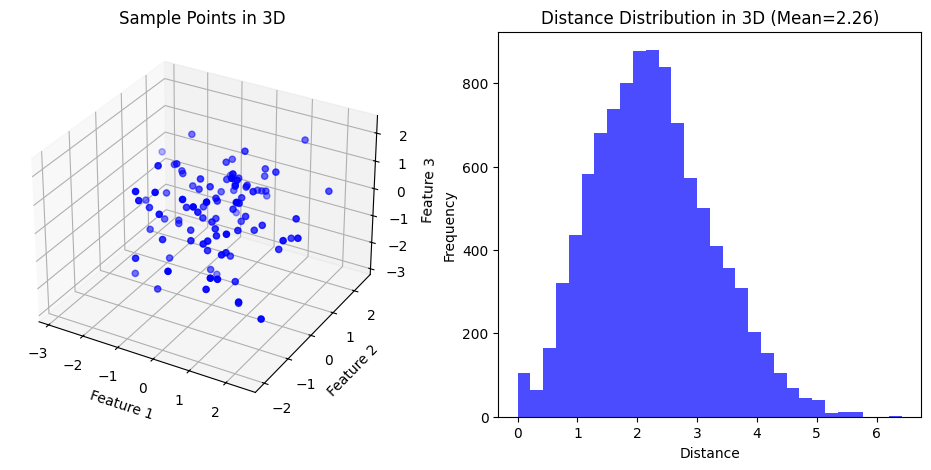

In [163]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
high_dim_data_3D = np.random.randn(100, 3)
distances_3D = euclidean_distances(high_dim_data_3D, high_dim_data_3D)
mean_distance = np.mean(distances_3D)
ax.scatter(high_dim_data_3D[:, 0], high_dim_data_3D[:, 1], high_dim_data_3D[:, 2], c='blue')
ax.set_title("Sample Points in 3D")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

ax2 = fig.add_subplot(122)
ax2.hist(distances_3D.flatten(), bins=30, alpha=0.7, color='b')
ax2.set_title(f"Distance Distribution in 3D (Mean={mean_distance:.2f})")
ax2.set_xlabel("Distance")
ax2.set_ylabel("Frequency")
plt.show()


Now, we can see that the points sampled cover less three-dimensional space, even if we cannot notice a big shift in the distribution. Bigger shifts, however, are noticed when dealing with higher dimensions:

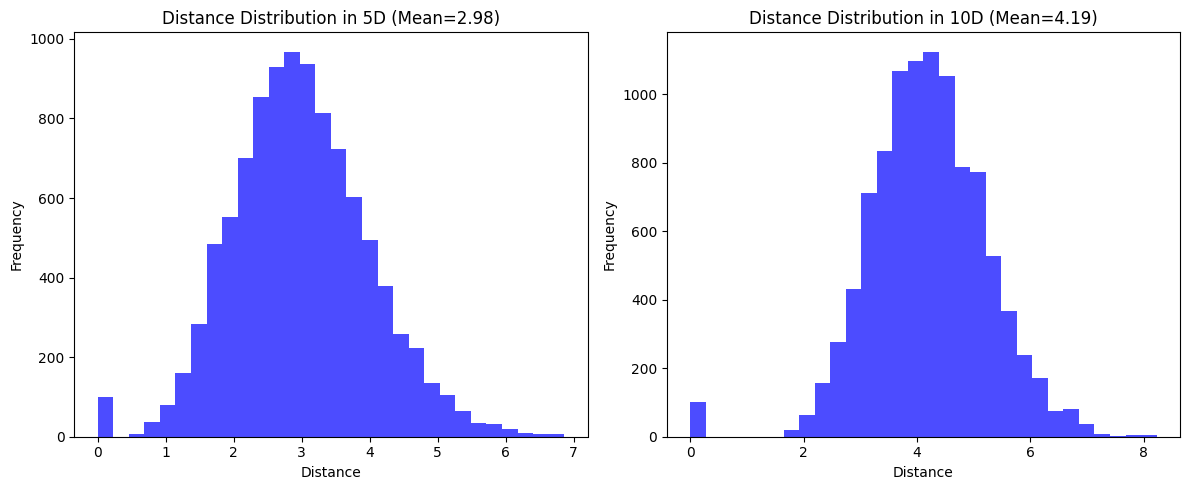

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for idx, dim in enumerate([5, 10]):
    high_dim_data = np.random.randn(100, dim)
    distances = euclidean_distances(high_dim_data, high_dim_data)
    mean_distance = np.mean(distances)
    
    # Histogram of distances
    axes[idx].hist(distances.flatten(), bins=30, alpha=0.7, color='b')
    axes[idx].set_title(f"Distance Distribution in {dim}D (Mean={mean_distance:.2f})")
    axes[idx].set_xlabel("Distance")
    axes[idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Exercises

Now there are a bunch of exercises for testing your understanding. Please do not use LLMs or ChatGPT to answer them (unless you are explicitly ordered to do so), but look at the documentation of different packages and websites for a better control of Python packages for ML \& AI.

### **Exercise 1: Understanding Mean and Covariance**
**Objective:** Compute and interpret the mean vector and covariance matrix.

- Generate a **3-dimensional multivariate dataset** with **200 samples**.
- Compute the **mean vector** and **covariance matrix**.
- Explain in **your own words** what the covariance matrix represents. Why are there repeated elements?

### **Exercise 2: Multivariate Normal Distribution**
**Objective:** Visualizing and understanding multivariate distributions.

- Generate a **bivariate normal distribution** with a specified mean vector and covariance matrix.
- Plot its **contour** and **3D surface plot**.
- Modify the **covariance structure** and observe how the shape of the distribution changes.
- What happens if the covariance is **0**? What if it is **negative**?

### **Exercise 3: Random Vectors and Transformations**
**Objective:** Understanding transformations of multivariate data.

- Generate a **5-sample** dataset from a 3D normal distribution.
- Compute the **Mahalanobis distance** of each sample from the mean.
- Apply a **linear transformation** (e.g., a matrix multiplication) to the dataset.
- Compute the **new covariance matrix**. What changed? Why?

### **Exercise 4: Compute and Compare Distance Metrics**
**Objective:** Understanding how different distance metrics behave.

- What key differences do you notice? Which metrics give the largest/smallest values? Why?
- Could you explain the intuition on why the metric is useful? In what aspects do the different metrics proposed differ? When are they useful?

### **Exercise 5: Visualizing Distance Matrices**
**Objective:** Learn how to interpret and visualize distances.

- Using the distance matrices from **Exercise 4**, create **heatmaps**.
- Compare the **patterns** in different metrics.
- If a dataset is **centered** (mean = 0) but has **highly correlated features**, which distance metric would be most affected?

### **Exercise 6: Detecting Outliers with Mahalanobis Distance**
**Objective:** Apply Mahalanobis distance in anomaly detection.

- Generate a **3D dataset with 100 samples** from a normal distribution.
- Add **three outliers** (points that are far from the mean).
- Compute **Mahalanobis distances** for all points.
- Identify **outliers** based on a threshold.
- Compare with **Euclidean distance**: Which method better detects outliers? Why? What is the intuition behind the Mahalanobis distance?

### **Exercise 7: Exploring High-Dimensional Space**
**Objective:** Observe how distances behave as dimensions increase.

- Generate **datasets** with 100 points for:
  - **1D, 2D, 3D, 5D, and 10D**.
- Compute the **mean pairwise distance** using different distances for each dataset.
- Plot **dimension vs. mean distance**.
- What do you notice? What does this tell you about high-dimensional data?

### **Exercise 8: Distance Concentration in High Dimensions**
**Objective:** Understanding why high-dimensional distances become uniform.

- Generate **1000 points in 100 dimensions**.
- Compute **all pairwise Euclidean distances**.
- Plot a histogram of the distances.
- What shape does the histogram take? How does this relate to the **curse of dimensionality**?

### **Exercise 9: Cosine Similarity vs. Euclidean Distance in High Dimensions**
**Objective:** Compare the behavior of different metrics in high dimensions.

- Generate **1000 points in 50D space**.
- Compute both **Euclidean distances** and **Cosine distances**.
- Compare their **distributions**.
- Which metric becomes **less meaningful** in high dimensions? Why?

### **Exercise 10: High-Dimensional Data Visualization**
**Objective:** Learn how to visualize high-dimensional data.

- Generate **a 10-dimensional dataset** with 1000 samples.
- Reduce its dimensions using **Principal Component Analysis (PCA)** to **2D and 3D**.
- Plot the **2D and 3D projections**.
- Discuss: How much information do we lose in these projections?

### **Extra Exercise: Real Challenges**
**Objective:** Learn how to do all this stuff with real data.

- Get a real-world dataset.
- Explore different visualization and descriptive statistics techniques.
- Interpret the results you obtain to explain useful insights of your dataset.
- Try to implement some ML methods for your own (help yourself with ChatGPT if needed) and obtain test metrics.
- Which ones work best in your setting? Is this what you expected? Why?